<a href="https://colab.research.google.com/github/Alexxakiode/Deep-Learning-Project-CartPole-Balancing-within-200-Steps-in-20-Episodes/blob/main/PredictionChallenge3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartPole Balancing within 200 Steps in 20 Episodes

In [1]:
# # install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
# !pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 685.5 kB/s eta 0:00:00


In [2]:
# !pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.3.0
    Uninstalling pygame-2.3.0:
      Successfully uninstalled pygame-2.3.0


In [3]:
! pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.4 MB/s eta 0:00:00


In [5]:
# load the gym module
import gym

# Load other basic modules
import matplotlib.pyplot as plt

# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam

import randint

import pickle

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import EpsGreedyQPolicy, LinearAnnealedPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent



In [7]:
# EpsGreedyQPolicy
# setup experience replay buffer
# here the sequential memory limit is set up the same as the nb_steps (number of steps)
# parameter in the fit method.  This means that all the action-states will fit into the
# memory buffer
# keep window_length as 1. It's used in other RL methods, but keep it to 1 in DQNs
memory = SequentialMemory(limit=10000, window_length=1)

# define the policy (how we select the actions)
policy_inner = EpsGreedyQPolicy()

In [8]:
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


## Run params

value_max = 1.0

value_min = 0.01

value_test = 0.05

nb_steps_warmup=10

target_model_update=1e-2

nb_steps=50000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 50000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    20/50000: episode: 1, duration: 1.112s, episode steps:  20, steps per second:  18, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 16.365135, mae: 75.835971, mean_q: 155.119371, mean_eps: 0.998515
    32/50000: episode: 2, duration: 0.098s, episode steps:  12, steps per second: 122, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 27.074064, mae: 76.492582, mean_q: 155.907291, mean_eps: 0.997476
    51/50000: episode: 3, duration: 0.138s, episode steps:  19, steps per second: 137, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.474 [0.000, 1.000],  loss: 50.489501, mae: 75.360250, mean_q: 154.132372, mean_eps: 0.995941
    84/50000: episode: 4, duration: 0.249s, episode steps:  33, steps per second: 133, episode reward: 33.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.545 [0.000, 1.000],  loss: 38.538694, mae: 76.090674, mean_q: 154

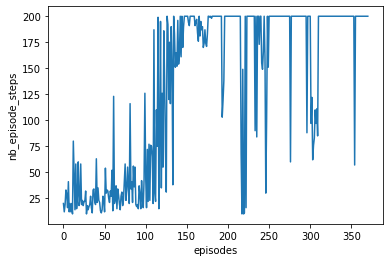

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


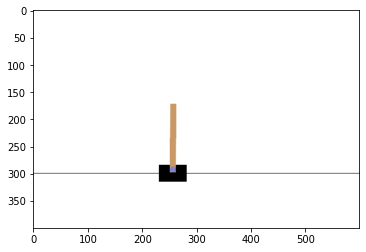

In [12]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.01, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))


#### PLEASE NOTE THAT I HAVE HAD TO RERUN THIS CELL SINCE I COPIED IT FROM MY OTHER TRIALS FILE, HENCE THE DIFFERENCE IN THE PLOT IMAGE.

## Run params

value_min = 0.05

nb_steps_warmup=10

target_model_update=1e-2

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   16/10000: episode: 1, duration: 0.843s, episode steps:  16, steps per second:  19, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.625 [0.000, 1.000],  loss: 17.407410, mae: 53.504501, mean_q: 108.467363, mean_eps: 0.998765
   51/10000: episode: 2, duration: 0.288s, episode steps:  35, steps per second: 121, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.543 [0.000, 1.000],  loss: 18.239691, mae: 54.091392, mean_q: 110.262780, mean_eps: 0.996865
   61/10000: episode: 3, duration: 0.078s, episode steps:  10, steps per second: 129, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 6.360101, mae: 53.901926, mean_q: 109.789648, mean_eps: 0.994728
   87/10000: episode: 4, duration: 0.191s, episode steps:  26, steps per second: 136, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.385 [0.000, 1.000],  loss: 8.230370, mae: 54.348962, mean_q: 110.77418

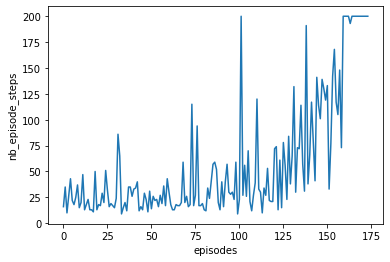

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.05, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

In [ ]:
dqn.test(env, nb_episodes=20, visualize=True)